In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
pickle_in = open("data_3class.pkl","rb")
data3 = pickle.load(pickle_in)
train_X = data3['train'][0]
train_Y = data3['train'][1]
test_X = data3['test'][0]
test_Y = data3['test'][1]

iteration 0: loss 2.000397
iteration 100: loss 1.308611
iteration 200: loss 0.969974
iteration 300: loss 0.925448
iteration 400: loss 0.898408
iteration 500: loss 0.873658
iteration 600: loss 0.844161
iteration 700: loss 0.804313
iteration 800: loss 0.749394
iteration 900: loss 0.678833
training accuracy: 0.75


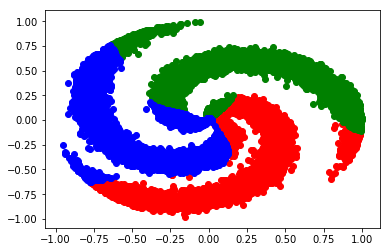

test accuracy: 0.75


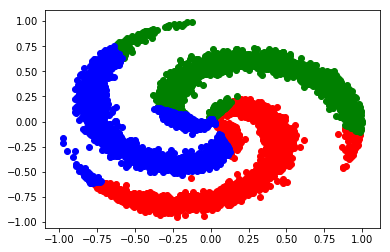

Training Error Plot


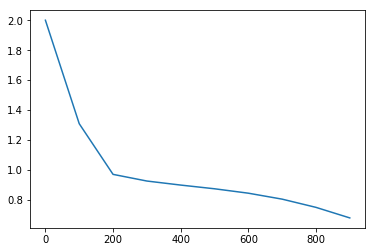

In [5]:
# initialize parameters randomly
D=2
K=3
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(train_Y)), train_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(num_examples), train_Y] = 0
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer = np.maximum(0, np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(test_Y)), test_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(len(test_Y)), test_Y] = 0
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 2.012287
iteration 100: loss 0.781865
iteration 200: loss 0.421096
iteration 300: loss 0.210879
iteration 400: loss 0.137363
iteration 500: loss 0.101486
iteration 600: loss 0.080472
iteration 700: loss 0.067732
iteration 800: loss 0.059130
iteration 900: loss 0.052929
training accuracy: 1.00


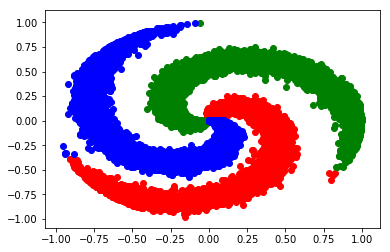

test accuracy: 1.00


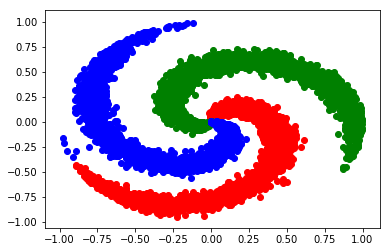

Training Error Plot


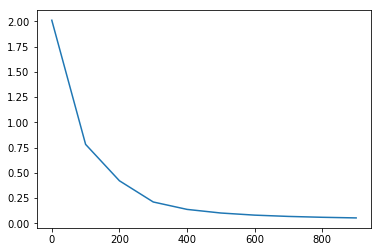

In [8]:
# initialize parameters randomly
D=2
K=3
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
    hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the ReLU non-linearity
    dhidden2[hidden_layer2 <= 0] = 0
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the ReLU non-linearity
    dhidden1[hidden_layer1 <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
class2 = train_X[predicted_classtrain==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()
hidden_layer1 = np.maximum(0, np.dot(test_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
class2 = test_X[predicted_classtest==2,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.scatter(class2[:,0],class2[:,1],c='b')
plt.show()    
    
print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

In [9]:
pickle_in = open("data_2class.pkl","rb")
data2 = pickle.load(pickle_in)
train_X = data2['train'][0]
train_Y = data2['train'][1]
test_X = data2['test'][0]
test_Y = data2['test'][1]

iteration 0: loss 1.000049
iteration 100: loss 0.548832
iteration 200: loss 0.488604
iteration 300: loss 0.474468
iteration 400: loss 0.447779
iteration 500: loss 0.391035
iteration 600: loss 0.295973
iteration 700: loss 0.231257
iteration 800: loss 0.212766
iteration 900: loss 0.204647
training accuracy: 0.92


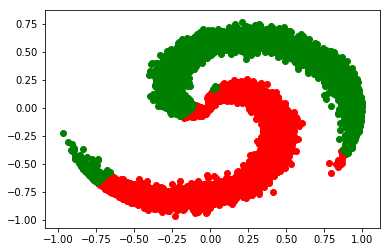

test accuracy: 0.91


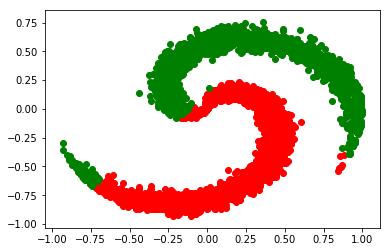

Training Error Plot


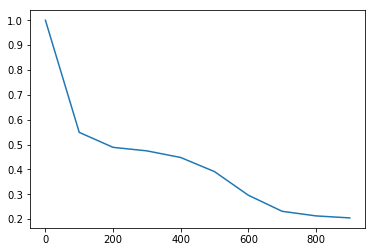

In [10]:
# initialize parameters randomly
D=2
K=2
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))#bias from input to hidden layer
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))#bias from hidden to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(train_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(train_Y)), train_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(num_examples), train_Y] = 0
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer = np.maximum(0, np.dot(test_X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
#correct_class_score = scores[np.arange(len(test_Y)), test_Y]
#margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
#margins[np.arange(len(test_Y)), test_Y] = 0
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()


print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()

iteration 0: loss 1.007458
iteration 100: loss 0.381990
iteration 200: loss 0.183658
iteration 300: loss 0.133470
iteration 400: loss 0.092611
iteration 500: loss 0.066410
iteration 600: loss 0.051632
iteration 700: loss 0.042262
iteration 800: loss 0.035602
iteration 900: loss 0.031193
training accuracy: 0.99


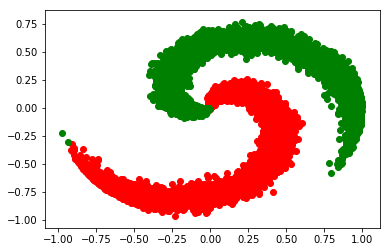

test accuracy: 0.99


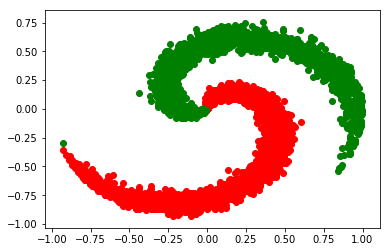

Training Error Plot


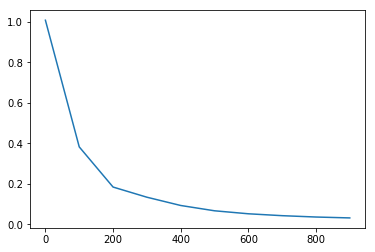

In [11]:
# initialize parameters randomly
D=2
K=2
h1 = 100 # size of hidden layer 1
h2 = 100 #size of hidden layer 2
W = 0.1 * np.random.randn(D,h1)
b = np.zeros((1,h1))#bias from input to hidden layer 1
W2 = 0.1 * np.random.randn(h1,h2)
b2 = np.zeros((1,h2))#bias from hidden layer 1 to hidden layer 2
W3 = 0.1 * np.random.randn(h2,K)
b3 = np.zeros((1,K))#bias from hidden layer 2 to output layer

step_size = 0.1
loss_plot=[]
x_plot=[]
# gradient descent loop
num_examples = train_X.shape[0]
for i in range(1000):
  
    #Forward
    hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
    hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
    scores = np.dot(hidden_layer2, W3) + b3
  
    correct_class_score = scores[np.arange(len(train_Y)), train_Y]

    # add an axis with np.newaxis so we can perform the substraction.
  
    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(num_examples), train_Y] = 0
    loss = np.sum(margins)/num_examples
  
    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, loss))
        loss_plot.append(loss)
        x_plot.append(i)
        
    #gradients
    mask = np.zeros(margins.shape)
    mask[margins > 0] = 1
    np_sup_zero = np.sum(mask, axis=1)
    mask[np.arange(num_examples), train_Y] = -np_sup_zero
    dscores = mask
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW3 = np.dot(hidden_layer2.T, dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores, W3.T)
    # backprop the ReLU non-linearity
    dhidden2[hidden_layer2 <= 0] = 0
    dW2 = np.dot(hidden_layer1.T,dhidden2)
    db2 = np.sum(dhidden2, axis=0, keepdims=True)
    
    # next backprop into hidden layer 1
    dhidden1 = np.dot(dhidden2, W2.T)
    # backprop the ReLU non-linearity
    dhidden1[hidden_layer1 <= 0] = 0
    # finally into W,b
    dW = np.dot(train_X.T, dhidden1)
    db = np.sum(dhidden1, axis=0, keepdims=True)
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    W3 += -step_size * dW3
    b3 += -step_size * db3
# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(train_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
# compute the class probabilities - softmax
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtrain = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_classtrain == train_Y)))
plt.figure()
class0 = train_X[predicted_classtrain==0,:]
class1 = train_X[predicted_classtrain==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()
hidden_layer1 = np.maximum(0, np.dot(test_X, W) + b) # ReLU activation
hidden_layer2 = np.maximum(0, np.dot(hidden_layer1, W2) + b2) # ReLU activation
scores = np.dot(hidden_layer2, W3) + b3
#exp_scores = np.exp(scores)
#probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
predicted_classtest = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_classtest == test_Y)))
plt.figure()
class0 = test_X[predicted_classtest==0,:]
class1 = test_X[predicted_classtest==1,:]
plt.scatter(class0[:,0],class0[:,1],c='r')
plt.scatter(class1[:,0],class1[:,1],c='g')
plt.show()    
    
print('Training Error Plot')
plt.figure()
plt.plot(x_plot,loss_plot)
plt.show()